# Machine Learning Project : Computer Price Prediction

### Introduction

In today's rapidly evolving digital landscape, laptops have become indispensable tools for both personal and professional use. With a plethora of models available, each boasting varying specifications and features, determining the appropriate price for a laptop can be challenging. This complexity underscores the need for a system that can accurately predict laptop prices based on their configurations.

### Objective

This project aims to develop a **Machine Learning Model** capable of predicting laptop prices using key specifications such as RAM size, storage capacity, screen size, and additional features. By leveraging historical data and advanced regression techniques, the model will learn the intricate relationships between these features and the corresponding prices.

The implementation of such a predictive model offers numerous benefits:

 - For Consumers: It provides a tool to estimate fair prices for laptops with desired specifications, aiding in informed purchasing decisions.


 - For Retailers: It assists in setting competitive prices based on market trends and product features.

 - For Manufacturers: It offers insights into how different configurations impact pricing, guiding product development and marketing strategies.

In the subsequent sections, we will delve into the data preprocessing steps, exploratory data analysis, model construction (**Random Forest** and **XGBoost**), evaluation metrics, and potential deployment strategies for the laptop price prediction model.

In order to provide adequate details to our projet for better understanding, we start by providing a meaningful description of our dataset (**Obtained from Kaggle**)  so that any explorer can understand the different variables found in our data.

 - **Price**: The Price of the computer

 - **Speed**: The speed

 - **HD**: How much hard drive is present

 - **Ram**: How much ram is present in the computer

 - **Screen**: The screen size

 - **CD**: Whether CD player is present or not

 - **Multi**: Are there multiple ports or not

 - **Premium**: If the computer premium quality

 - **ADS**: The ads value of the computer

 - **Trend**: The trend value of the computer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score



### Upload Our Dataset

In [3]:
data = pd.read_excel("C:/Users/MERLIN/Downloads/Computer_Price_Prediction.xlsx")

In [5]:
data.head()

,Price,Speed,HD,Ram,Screen,CD,Multi,Premium,ADS,Trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


By using **data.head()** we have can see that our data is made up of **Numerical** and **Categorical** variables.

### Overview of our Dataset

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    6259 non-null   int64 
 1   Speed    6259 non-null   int64 
 2   HD       6259 non-null   int64 
 3   Ram      6259 non-null   int64 
 4   Screen   6259 non-null   int64 
 5   CD       6259 non-null   object
 6   Multi    6259 non-null   object
 7   Premium  6259 non-null   object
 8   ADS      6259 non-null   int64 
 9   Trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB
None


### Let's look for missing values in our dataset using a heatmap

<Axes: >

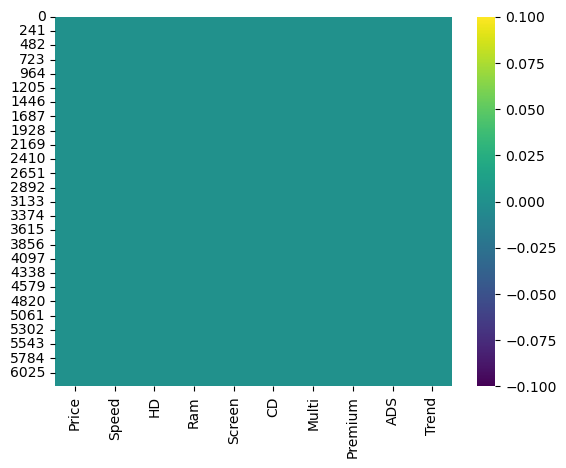

In [12]:
#visualising missing values
sns.heatmap(data.isnull(),cmap='viridis')

`Our heatmap show's that there are no missing data in our dataset.`

### Selecting the different set of variables: `Numeric` and `Categorical` variables

In [14]:
import pandas as pd

# Extract numerical variables (columns with numeric data types)
numeric_vars = data.select_dtypes(include=['number']).columns.tolist()

# Extract categorical variables (columns with non-numeric data types)
categorical_vars = data.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Variables:", numeric_vars)
print("Categorical Variables:", categorical_vars)


Numerical Variables: ['Price', 'Speed', 'HD', 'Ram', 'Screen', 'ADS', 'Trend']
Categorical Variables: ['CD', 'Multi', 'Premium']


### Let's provide some statistics about Numeric and Categorical variables 

In [17]:
data[numeric_vars].describe()

,Price,Speed,HD,Ram,Screen,ADS,Trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


 - The average **Price** is approximately 2219.58, with prices ranging from 949.00 to 5399.00. The interquartile range (IQR) is 801.00 (2595.00 - 1794.00), indicating moderate variability in pricing.
 - The average **Speed** is 52.01 units, with a wide range indicating significant variability in this feature across products.
 - There's a substantial variation in **Hard Drive** capacities, with some products offering up to 2100, suggesting a diverse product lineup catering to different storage needs.
 - The average **RAM** is 8.29 GB, but with a standard deviation of 5.63 GB, indicating a wide spread in memory offerings among products.
 - **Screen** sizes are relatively consistent, averaging around 14.61 inches, with minimal variation, suggesting a standard screen size across most products.
 - **Advertising** spend varies, with some products receiving significantly more investment, potentially influencing their market performance.
 - The **Trend** metric shows considerable variability, indicating differing levels of market interest or popularity among products.
 

In [20]:
for col in categorical_vars:
    print(f"--- Number of appearances '{col}' ---")
    print(data[col].value_counts())
    print("\n")


--- Number of appearances 'CD' ---
CD
no     3351
yes    2908
Name: count, dtype: int64


--- Number of appearances 'Multi' ---
Multi
no     5386
yes     873
Name: count, dtype: int64


--- Number of appearances 'Premium' ---
Premium
yes    5647
no      612
Name: count, dtype: int64




 - The most common category for **CD** is **no**, appearing **3351** times, which is approximately **53.5%** of the data.
 - The **Multi** variable has **no** being the predominant category, occurring **5386** times. This represents about **86%** of the entries.
 - For the **Premium** variable, **yes** is the most frequent category, appearing **5647** times, which is approximately **90.2%** of the data. This suggests a strong skew towards the **yes** category.

### Graphical representation of Categorical variables through the use of Pie plots.

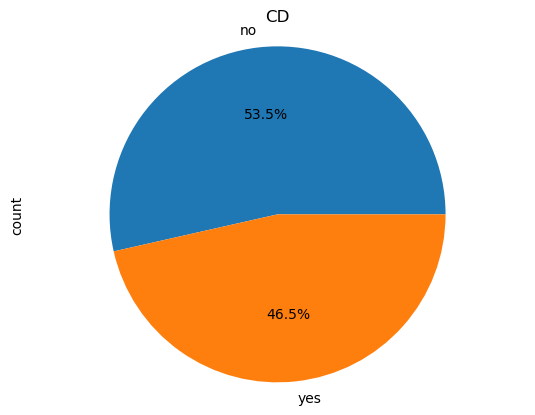

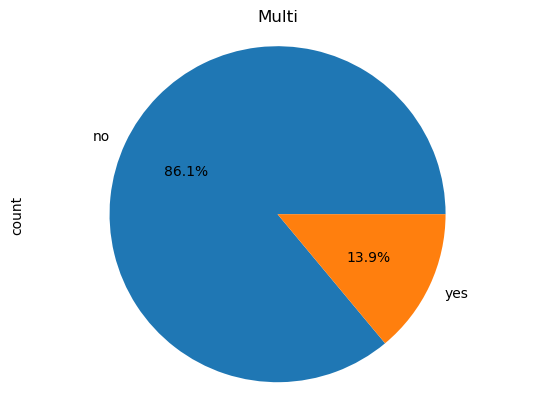

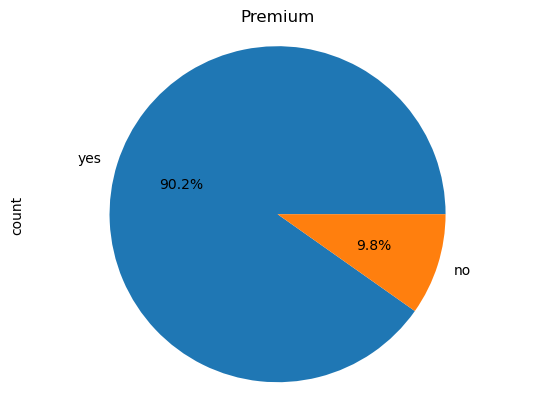

In [24]:
cat_vars=['CD', 'Multi', 'Premium']

#Providing Pie plots for each caregorical variables
for var in cat_vars:
    data[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

### Graphical representation of Numerical variables through the use of Boxplots.

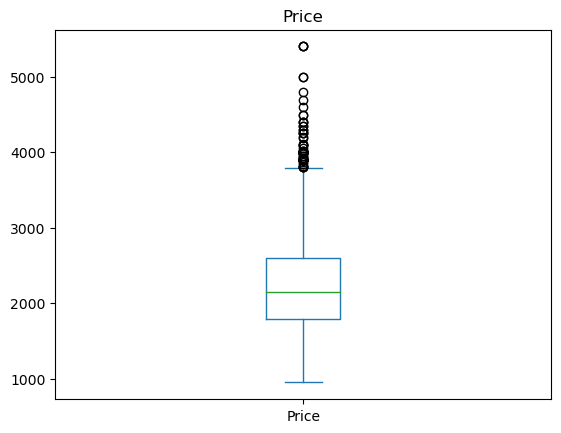

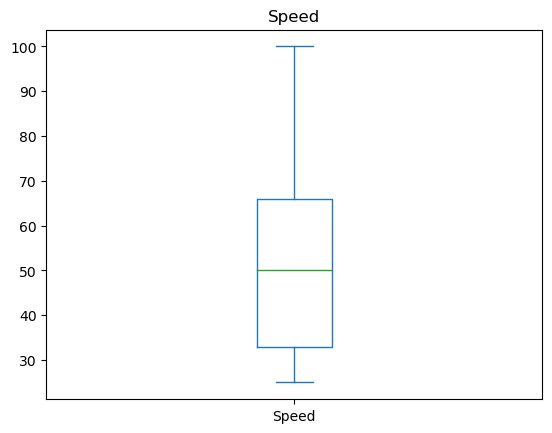

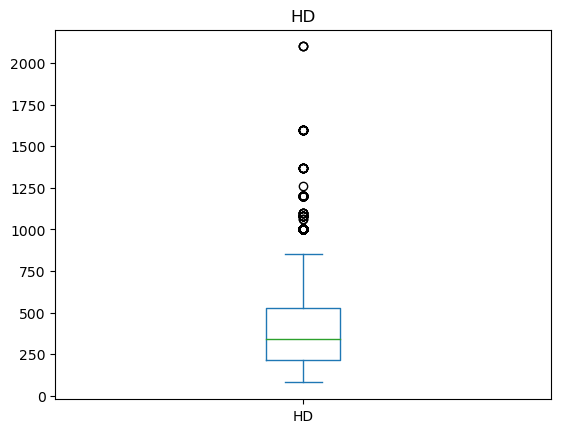

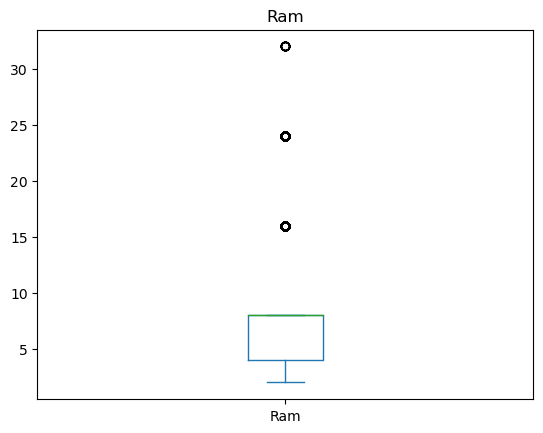

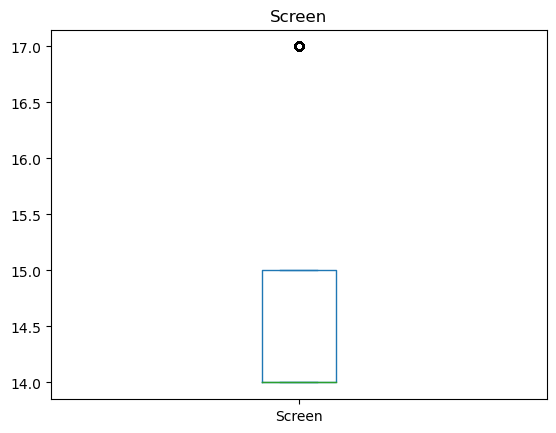

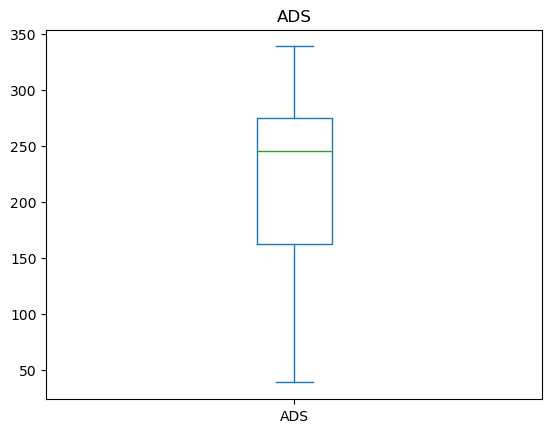

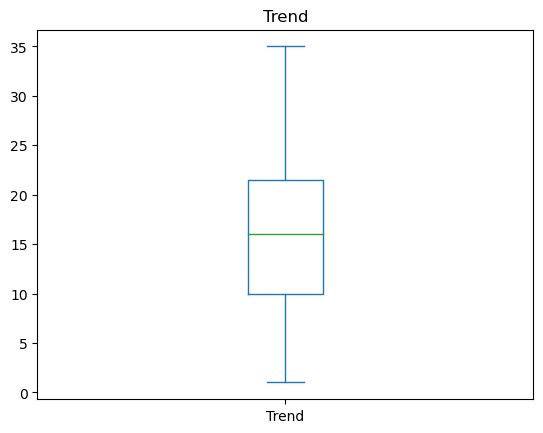

In [27]:
num_vars= numeric_vars

#providing box plots for each variable
for var in num_vars:
    data[var].plot(kind='box')
    plt.title(var)
    plt.show()

From a first view, one may attempt to start working on outliers but it will not be the case for this project. In real life situation, we should expect to have computers with very high prices since the computer can be **Premium**, having a significant number of **RAM** and so on. I am opened to any suggestions regarding this point.

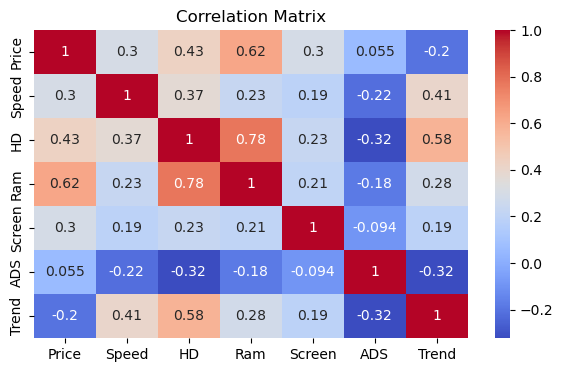

In [30]:
# Correlation matrix heatmap
plt.figure(figsize=(7,4))
sns.heatmap(data[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Bivariate Analysis and variable selection.

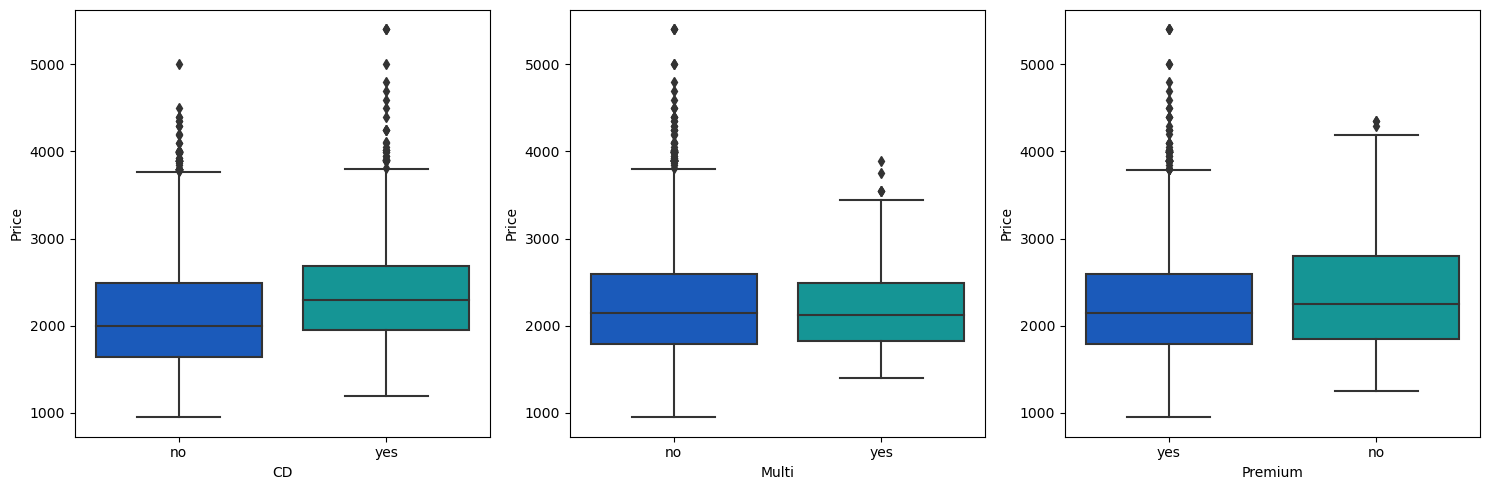

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot for each case
sns.boxplot(x='CD', y='Price', data=data, palette='winter', ax=axes[0])
sns.boxplot(x='Multi', y='Price', data=data, palette='winter', ax=axes[1])
sns.boxplot(x='Premium', y='Price', data=data, palette='winter', ax=axes[2])

plt.tight_layout()
plt.show()

Looking at these box plots, one shoud notice that the variable **Multi** will likely not be usefull for our analysis. We should have expected that computers with **multiple ports** will have a high average price compared to those not having it. To confirm this intuition, we will investigate this further using a **T-test**.

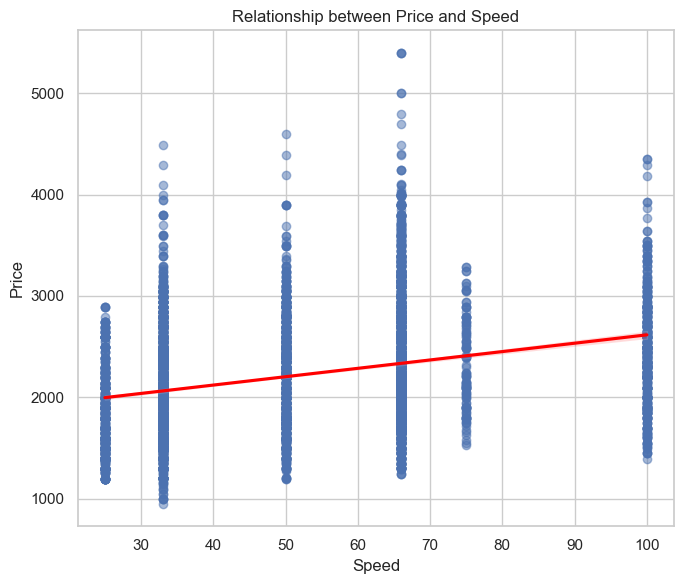

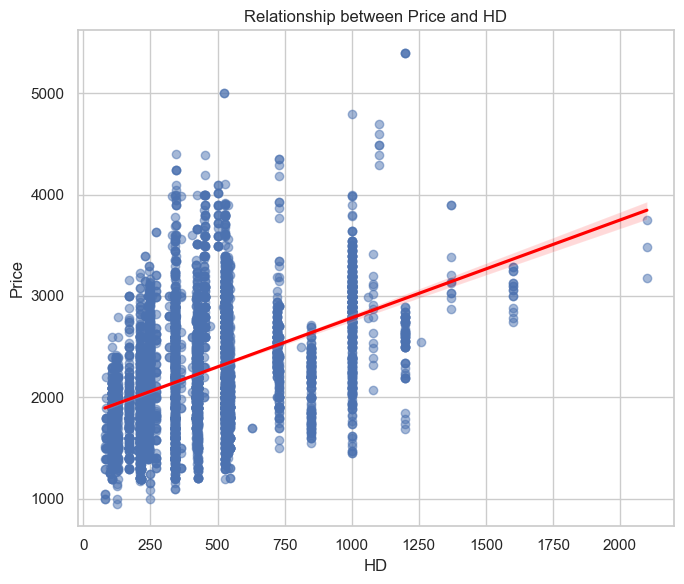

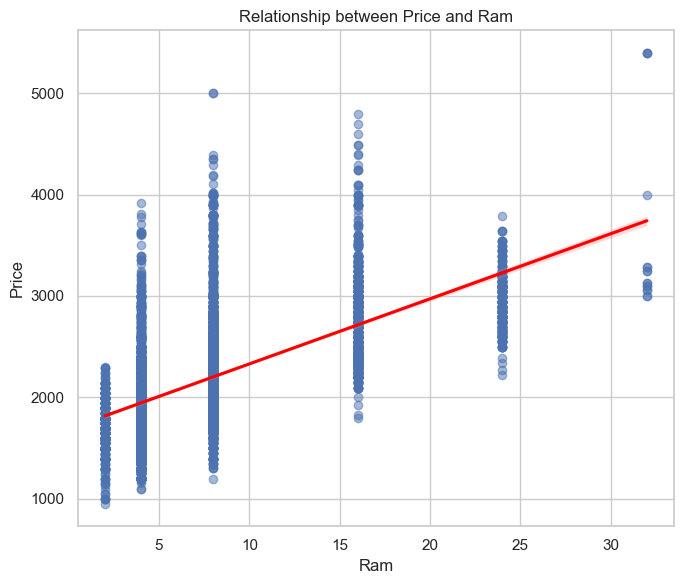

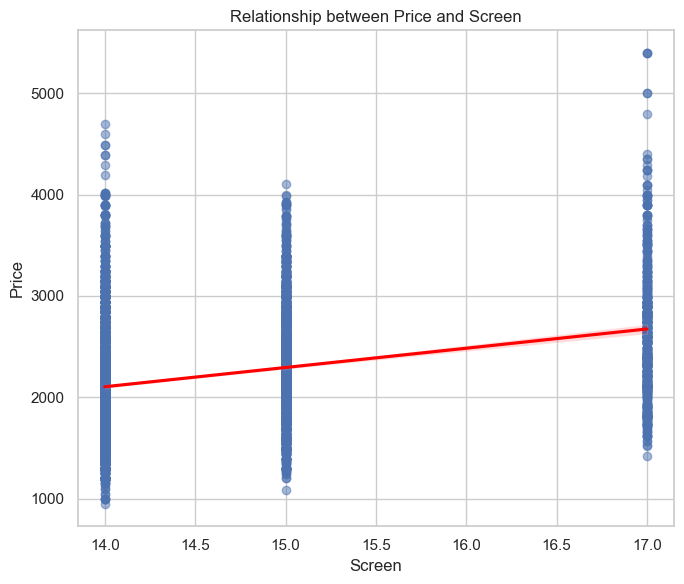

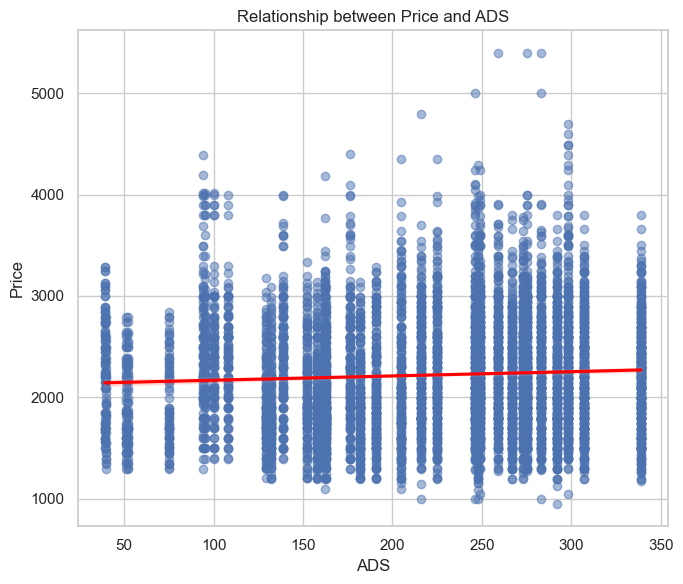

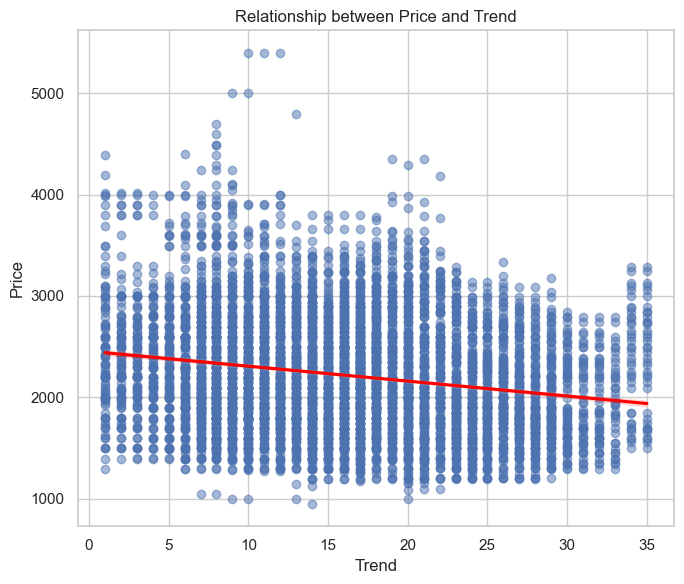

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables excluding 'Price'
numerical_vars = ['Speed', 'HD', 'Ram', 'Screen', 'ADS', 'Trend']

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create scatter plots with regression lines
for var in numerical_vars:
    plt.figure(figsize=(7, 6))
    sns.regplot(x=var, y='Price', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Relationship between Price and {var}')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()


### Encoding Categorical variables

In [39]:
# Map Yes/No to 1/0 for the categorical columns
data['CD'] = data['CD'].map({'yes': 1, 'no': 0})
data['Multi'] = data['Multi'].map({'yes': 1, 'no': 0})
data['Premium'] = data['Premium'].map({'yes': 1, 'no': 0})

# Verify the changes
print(data.head())


   Price  Speed   HD  Ram  Screen  CD  Multi  Premium  ADS  Trend
0   1499     25   80    4      14   0      0        1   94      1
1   1795     33   85    2      14   0      0        1   94      1
2   1595     25  170    4      15   0      0        1   94      1
3   1849     25  170    8      14   0      0        0   94      1
4   3295     33  340   16      14   0      0        1   94      1


Here we will perform a T-test between our Output variable **Price** and the **Categorical variables**. It's important to note that in general, a t-test may be used to evaluate whether a single group differs from a known value (a one-sample t-test), whether two groups differ from each other (an independent two-sample t-test), or whether there is a significant difference in paired measurements (a paired, or dependent samples t-test). Our case present a sitution where the Categorical variables have two groupes whiche are **1** (Yes) and **0** (No).

In [42]:
import pandas as pd
from scipy.stats import ttest_ind

# List of categorical variables
cat_vars = ['Premium', 'CD', 'Multi']

#significant level
alpha = 0.05  

# Liste pour stocker les résultats
results = []

# looping each categorical varaible
for var in cat_vars:
    # grouping the data : 1 for "Yes" and 0 for "No"
    group_yes = data[data[var] == 1]['Price']
    group_no = data[data[var] == 0]['Price']
    
    # T - test
    t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)
    
    # Decision : if p_value < alpha, we accepte the variable (meaning that its statistically significant)
    decision = 'Accepted' if p_value < alpha else 'Rejected'
    
    # providing the results to the lists defined
    results.append({
        'Variable': var,
        't_statistic': t_stat,
        'p_value': p_value,
        'Decision': decision
    })

# providing the results in the form of a dataframe
summary_table = pd.DataFrame(results)
print(summary_table)


  Variable  t_statistic       p_value  Decision
0  Premium    -5.749934  1.322103e-08  Accepted
1       CD    16.074863  5.242466e-57  Accepted
2    Multi    -1.546315  1.222617e-01  Rejected


From our results, we observe that the variable **Multi** is rejected meaning that it's not statistically signifiacnt regarding our output variable **since the p_value is greater than 5%** so it will be droped out in the next steps.

In order to investigate the relationship between **Price** and the **Numerical Variables**, we will perform a Pearson Correlation test which is a statistical method that measures the similarity or correlation between two data objects by comparing their attributes and calculating a score ranging from -1 to +1. A high score indicates high similarity, while a score near zero indicates no correlation. This method is parametric and relies on the mean parameter of the objects, making it more valid for normally distributed data.

In [46]:
import pandas as pd
from scipy.stats import pearsonr

# varaibles to test
quant_vars = ['Speed', 'HD', 'Ram', 'Screen','ADS', 'Trend']

# Significance level
alpha = 0.05  

# to get the results
results = []

# Looping through each quantitative variable
for var in quant_vars:
    corr, p_value = pearsonr(data[var], data['Price'])
    # Decision : if p_value < alpha, we accepte the variable (meaning that its statistically significant)
    decision = 'Acceptée' if p_value < alpha else 'Rejetée'
    # providing the results to the lists defined
    results.append({
        'Variable': var,
        'Coefficient de corrélation': corr,
        'p-value': p_value,
        'Décision': decision
    })

# providing the results in the form of a dataframe
summary_table = pd.DataFrame(results)
print(summary_table)


  Variable  Coefficient de corrélation        p-value  Décision
0    Speed                    0.300976  3.228883e-131  Acceptée
1       HD                    0.430258  1.672121e-280  Acceptée
2      Ram                    0.622748   0.000000e+00  Acceptée
3   Screen                    0.296041  8.145418e-127  Acceptée
4      ADS                    0.054540   1.579795e-05  Acceptée
5    Trend                   -0.199987   1.754029e-57  Acceptée


### Test de corrélation de Spearman 

In [49]:
import pandas as pd
from scipy.stats import spearmanr

# Selecting numeric variables
df_numeric = data.select_dtypes(include=['number'])

# Verify if the column Price is present
if 'Price' in df_numeric.columns:
    # removing "Price" from the list
    variables = df_numeric.columns.drop('Price')
    
    # Proving a list to get the results
    spearman_results = []

    # Significance level
    alpha = 0.05

    # Spearman correlation between 'Price' and numeric variables
    for var in variables:
        coef, p_value = spearmanr(data['Price'], data[var], nan_policy='omit')
        # Determine if the correlation is statistically significant
        significance = 'Acceptée' if p_value <= alpha else 'Rejetée'
        spearman_results.append({'Variable': var, 'Coefficient de Spearman': coef, 'p-value': p_value, 'Significativité': significance})

    # provide the results in the form of a dataframe
    spearman_df = pd.DataFrame(spearman_results)

    print(spearman_df)
else:
    print("The column 'Price' is not in the DataFrame.")


  Variable  Coefficient de Spearman        p-value Significativité
0    Speed                 0.325821  1.017518e-154        Acceptée
1       HD                 0.458673   0.000000e+00        Acceptée
2      Ram                 0.673002   0.000000e+00        Acceptée
3   Screen                 0.303067  4.149985e-133        Acceptée
4       CD                 0.230303   3.932403e-76        Acceptée
5    Multi                -0.003443   7.853814e-01         Rejetée
6  Premium                -0.064694   3.014130e-07        Acceptée
7      ADS                 0.052854   2.869565e-05        Acceptée
8    Trend                -0.191543   8.578738e-53        Acceptée


From our results, we observe that the variable **Multi** is rejected meaning that it's not statistically signifiacnt regarding our output variable **since the p_value is greater than 5%** so it will be droped out in the next steps.

### Final Dataset 

In [52]:
final_data = data.drop('Multi',axis=1)
final_data.head()

,Price,Speed,HD,Ram,Screen,CD,Premium,ADS,Trend
0,1499,25,80,4,14,0,1,94,1
1,1795,33,85,2,14,0,1,94,1
2,1595,25,170,4,15,0,1,94,1
3,1849,25,170,8,14,0,0,94,1
4,3295,33,340,16,14,0,1,94,1


## Construction and Evalution of Random Forest and XGBoost Models

The choice for of these two models can be explained as follows:

**1 - Random Forest**
   
- **Robustness to Overfitting** : Random Forest reduces overfitting by averaging predictions from multiple decision trees, leading to better generalization on unseen data.

- **Handling of Mixed Data Types** : It can seamlessly process both numerical and categorical variables, especially after encoding categorical variables into numerical formats.

- **Feature Importance Estimation** : The algorithm provides insights into feature importance, helping to identify which variables most influence the target variable, 'Price'.

- **Non-Parametric Nature** : Being non-parametric, Random Forest doesn't assume any specific data distribution, making it flexible for various types of data.

**2 - XGBoost**

- **High Predictive Accuracy** : XGBoost often achieves superior accuracy by implementing gradient boosting with regularization, which helps in capturing complex patterns in the data.

- **Regularization Techniques** : It incorporates both L1 and L2 regularization to prevent overfitting, enhancing the model's generalization capabilities.

- **Efficiency and Scalability** : Designed for speed and performance, XGBoost efficiently handles large datasets through parallel processing and optimized computing resources.

- **Handling of Missing Values** : XGBoost can handle missing data internally, reducing the need for extensive data preprocessing.

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

features = ['Speed', 'HD', 'Ram', 'Screen', 'ADS', 'Trend', 'CD', 'Multi', 'Premium']
target = 'Price'

X = data[features]
y = data[target]

# Dividing data into Train and Test
X_train, X_test, y_train, y_test_RF = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Training the model
forest = RandomForestRegressor()

forest.fit(X_train_scaled,y_train)


RandomForestRegressor()

In [57]:
# Evaluting the model using Cross validation (R² is used to measure the performance)
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='r2')
print("Validation croisée (R²) sur l'entraînement :", scores)
print("Score moyen R² :", scores.mean())


Validation croisée (R²) sur l'entraînement : [0.92018288 0.92432335 0.91216908 0.91544267 0.9222371 ]
Score moyen R² : 0.9188710160496054


In [59]:
# Prediction on test data
y_pred_RF = forest.predict(X_test_scaled)
test_score = forest.score(X_test_scaled, y_test_RF)
print("Test Score R² :", test_score)
print("RMSE =", np.sqrt(mean_squared_error(y_test_RF, y_pred_RF)))

Test Score R² : 0.9159010764989998
RMSE = 165.74965944072423


In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividing our data
X_train, X_test, y_train, y_test_XG = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_XG = xgb_model.predict(X_test_scaled)

# Evaluation
rmse = mean_squared_error(y_test_XG, y_pred_XG, squared=False)
print(f"RMSE : {rmse}")

# Prediction on test data
y_pred_XG = xgb_model.predict(X_test_scaled)
test_score = xgb_model.score(X_test_scaled, y_test_XG)
print("Test Score R² :", test_score)

RMSE : 144.58583900918768
Test Score R² : 0.9360063672065735


C:\Users\MERLIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


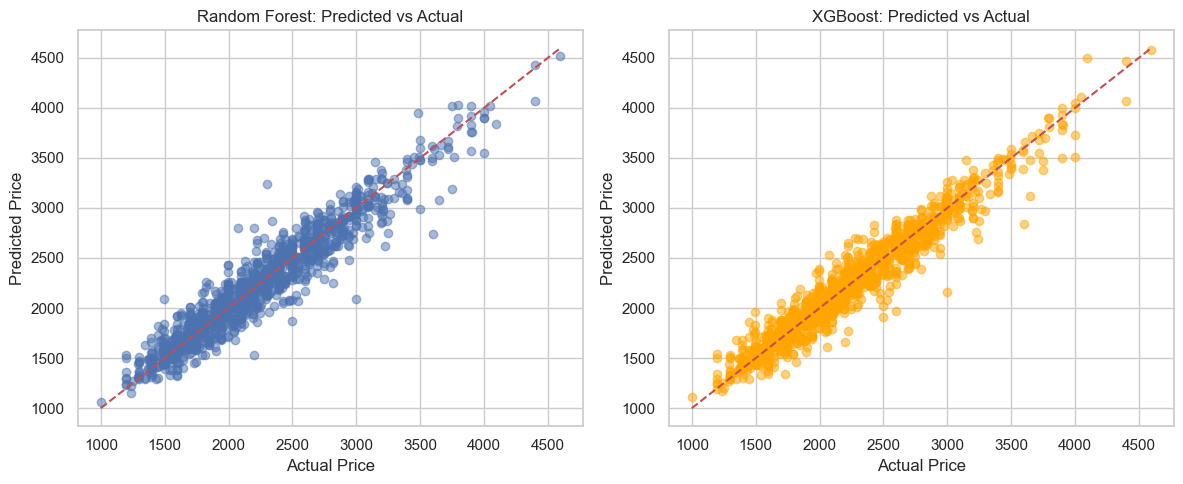

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Comparing Actual Vs Predicted values
results_RF = pd.DataFrame({'Actual': y_test_RF.values, 'Predicted': y_pred_RF})
results_XG = pd.DataFrame({'Actual': y_test_XG.values, 'Predicted': y_pred_XG})

# Using Subplot to create 2 graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Random Forest
axes[0].scatter(results_RF['Actual'], results_RF['Predicted'], alpha=0.5)
axes[0].plot([results_RF['Actual'].min(), results_RF['Actual'].max()],
             [results_RF['Actual'].min(), results_RF['Actual'].max()], 'r--')
axes[0].set_title('Random Forest: Predicted vs Actual')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# Plot XGBoost
axes[1].scatter(results_XG['Actual'], results_XG['Predicted'], alpha=0.5, color='orange')
axes[1].plot([results_XG['Actual'].min(), results_XG['Actual'].max()],
             [results_XG['Actual'].min(), results_XG['Actual'].max()], 'r--')
axes[1].set_title('XGBoost: Predicted vs Actual')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

# providing the plots
plt.tight_layout()
plt.show()


🔍 Interpretation

**1. R² (Coefficient of Determination)**
 - **Definition**: **R²** measures the proportion of variance in the dependent variable (**Price**) that can be predicted from the independent variables. It ranges from 0 to 1, with higher values indicating better explanatory power.

 - Random Forest: An **R²** of **0.9159** suggests that approximately **91.59%** of the variability in **Price** is explained by the model.

 - XGBoost: An **R²** of **0.9360** indicates that about **93.60%** of the variability in 'Price' is accounted for by the model.

 - Comparison: XGBoost demonstrates a higher R², implying it captures more variance in the data compared to Random Forest.

**2. RMSE (Root Mean Square Error)**
 - Definition: **RMSE** quantifies the average magnitude of the prediction errors, with lower values indicating better model performance. It is expressed in the same units as the target variable.

 - Random Forest: An **RMSE** of **166.10** suggests that, on average, the model's predictions deviate from the actual **Price** by approximately **166.10 units**.

 - XGBoost: An **RMSE** of **144.59** indicates a smaller average prediction error, with deviations around **144.59 units**.

 - Comparison: **XGBoost** achieves a **lower RMSE**, reflecting more accurate predictions than **Random Forest**.

**Conclusion**
 - Both models perform well, but **XGBoost outperforms Random Forest** in this context, exhibiting **higher explanatory power (R²)** and **lower prediction error (RMSE)**.
 - This suggests that **XGBoost** is more effective for predicting computer prices based on the given features.